# Density of DM halos

Implementation of the (Jing & Suto 2002) algorithm to compute density shapes. 


$\rho = \sum_{i} m_i W(r, h_i)$


$ W(r, h_i) = \dfrac{1}{\pi h_i^3} \begin{cases}
    1 - \dfrac{3}{2}\left(\dfrac{r}{h_i} \right)^2 + \dfrac{3}{4}\left(\dfrac{r}{h_i} \right)^3       & \quad \text{if } (r \leq h_i)\\
    \dfrac{1}{4}\left(2-\dfrac{r}{h_i}\right)^3  & \quad \text{if } (h_i \leq r \leq 2h_i)\\
    0 & \quad \text{otherwise}
  \end{cases} $
  
  
  $h_i$ is one half of the sphere containing the 32 neighboors

## To do:

1. Implement Inertia tensor.

In [1]:
%pylab inline
from sklearn.neighbors import KDTree
import warnings
warnings.filterwarnings('ignore')
import matplotlib as mpl

Populating the interactive namespace from numpy and matplotlib


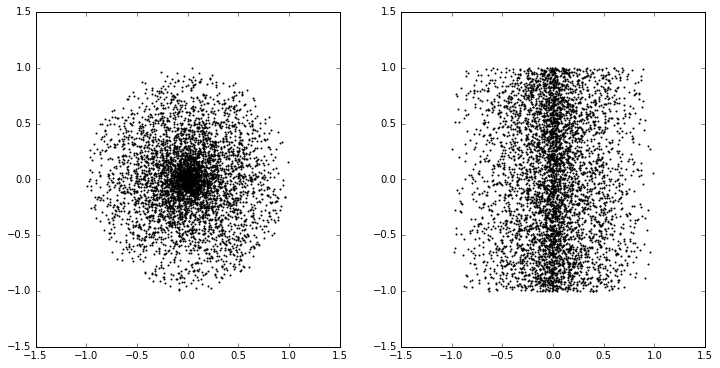

In [2]:
# Test particles to play with
figure(figsize=(12, 6))
n_particles = 5000
phi = random.rand(n_particles) * 2*pi
theta = random.rand(n_particles) * 2 - 1
R = random.rand(n_particles)
X = R * sin(phi) * sin(arccos(theta))
Y = R * cos(phi) * sin(arccos(theta))
Z = random.rand(n_particles) * 2 - 1
plt.subplot(1, 2, 1)
scatter(X, Y, s=1)
plt.subplot(1, 2, 2)
scatter(X, Z, s=1)
M = random.rand(n_particles) * 10 

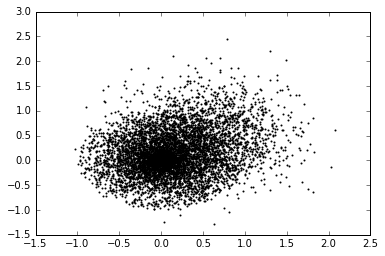

In [3]:

x1 = np.random.normal(0.5, 0.5, 2000)
y1 = np.random.normal(0.5, 0.5, 2000)
z1 = np.zeros(2000)

X1 = np.concatenate((X, x1))
Y1 = np.concatenate((Y, y1))
Z1 = np.concatenate((Z, z1))

scatter(X1, Y1, s=1)

## 1. Find the 32 nearest neighboors to each particle

[ 0.17719191  0.02125599 -0.53466956] [0 0 0]
[[ 0.01253015  0.01260278  0.01651556  0.02100267  0.02118237  0.02604353
   0.02752312  0.02830829  0.02956686  0.03389432  0.03480238  0.03831972
   0.04836089  0.04865634  0.04995917  0.05118066  0.05151106  0.05270033
   0.0572774   0.05874357  0.05877582  0.06445328  0.06647254  0.06690395
   0.0669613   0.06696289  0.06767906  0.06830372  0.0683389   0.06918999
   0.07148506  0.07447987  0.07490672]]


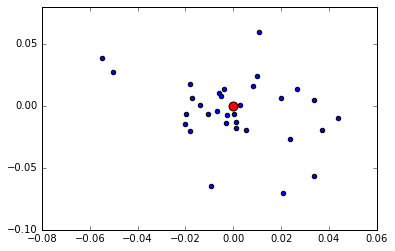

In [4]:
#playing with nearest neigboors
D = np.array([X, Y, Z])
D = D.T
tree = KDTree(D, leaf_size=2500) 
D1 = np.array([0, 0, 0])
dist, ind = tree.query(D1, k=33)   
scatter(X[ind], Y[ind])
scatter(D1[0], D1[1], s=80, c='r')
print D[0], D1
print dist

In [5]:
#Finding the 32 neighboors
def nearest_neighboors(x, y, z, r):
    D = np.array([x, y, z])
    D = D.T
    tree = KDTree(D, leaf_size=2500)  
    dist, ind = tree.query(r, k=33)   
    return dist[0], ind[0]

In [6]:
distances, ids = nearest_neighboors(X, Y, Z, [0, 0,0])

In [7]:
distances[0]

0.012530146264807395

In [9]:
# Evaluating the kernel
def kernel(r, h):
    if r<h:
        W = 1. - 3./2.*(r/h)**2.0 + 3./4.*(r/h)**3.0
    elif((r>h) & (r<2.0*h)):
        W = 1./4. * (2. - r/h)**3.
    else:
        W = 0.0
    return W/(np.pi*h**3.0)

In [10]:
#Computing the density
def density(x,y,z, mass, r):
    dn, idn = nearest_neighboors(x, y, z, r)
    h = np.max(dn)/2.0
    rho = np.zeros(33.0)
    m = mass[idn]
    for i in range(len(dn)):
        W = kernel(dn[i], h)
        rho[i] = m[i]*W
    return np.sum(rho)

In [11]:
#Making a grid
def grid(X, Y, Z, res):
    mass = np.ones(len(X))
    rho = np.zeros((res, res))
    rx = np.linspace(min(X)+min(X)*0.2, max(X)+max(X)*0.2, res)
    ry = np.linspace(min(Y)+min(Y)*0.2, max(Y)+max(Y)*0.2, res)
    for i in range(res):
        for j in range(res):
            rho[i][j] = density(X, Y, Z, mass, [rx[i], ry[j], 0])
    return rho
    

In [15]:
# this might take a while depending on the resolution
Z = np.zeros(len(X))
rho_test = grid(X1, Y1, Z1, 500)

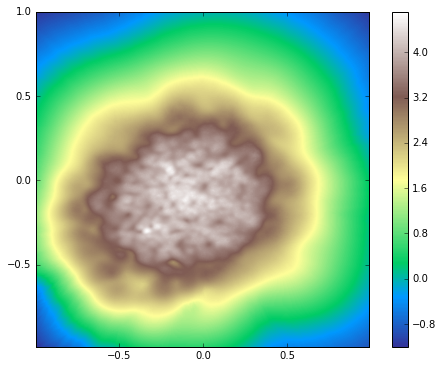

In [16]:
figure(figsize=(8,6))
imshow(np.log10(rho_test.T), origin='lower', extent=[min(X), max(X), min(Y), max(Y)], cmap='terrain')
colorbar()
#scatter(X, Y, s=0.1, alpha=0.5)

In [170]:
# My own library!
from density import grid

In [182]:
rho_1 = grid(X1, Y1, Z1, 100)

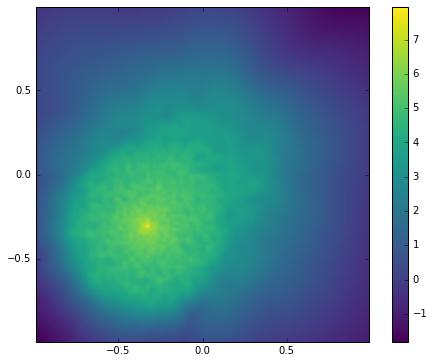

In [189]:
figure(figsize=(8,6))
imshow(np.log10(rho_1.T), origin='lower', extent=[min(X), max(X), min(Y), max(Y)], cmap='viridis')
colorbar()